In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from math import isnan

In [50]:
data = dict()
data["fake"]  = pd.read_csv("DATASET/fusers.csv")
data["legit"] = pd.read_csv("DATASET/users.csv")

In [51]:
data["legit"] = data["legit"].drop(["id", "name", "screen_name", "statuses_count", "created_at", "lang", "location", "geo_enabled", "default_profile_image", "profile_image_url", "profile_banner_url", "profile_use_background_image", "profile_background_image_url_https", "profile_text_color", "profile_image_url_https", "profile_sidebar_border_color", "profile_background_tile", "profile_sidebar_fill_color", "profile_background_image_url", "profile_background_color", "profile_link_color", "utc_offset", "protected", "verified", "dataset", "updated"], axis=1)
data["fake"]  = data["fake"].drop(["id", "name", "screen_name", "statuses_count", "created_at", "lang", "location", "geo_enabled", "default_profile_image", "profile_image_url", "profile_banner_url", "profile_use_background_image", "profile_background_image_url_https", "profile_text_color", "profile_image_url_https", "profile_sidebar_border_color", "profile_background_tile", "profile_sidebar_fill_color", "profile_background_image_url", "profile_background_color", "profile_link_color", "utc_offset", "protected", "verified", "dataset", "updated"], axis=1)

In [52]:
def is_default_profile(arr):
    ret = []
    for l in arr:
        if l == 1.:
            ret.append(1.)
        else:
            ret.append(-1.)
    return ret

def has_description(arr):
    ret = []
    for l in arr:
        if type(l) == str:
            ret.append(1.)
        else:
            ret.append(-1.)
    return ret

def has_url(arr):
    ret = []
    for l in arr:
        if type(l) == str and len(l) > 0:
            ret.append(1.)
        else:
            ret.append(-1.)
    return ret

def has_timezone(arr):
    ret = []
    for l in arr:
        if type(l) == str and len(l) > 0:
            ret.append(1.)
        else:
            ret.append(-1.)
    return ret

def is_listed(arr):
    ret = []
    for l in arr:
        if l > 0.:
            ret.append(1.)
        else:
            ret.append(-1.)
    return ret

def has_favourites(arr):
    ret = []
    for l in arr:
        if l > 0.:
            ret.append(1.)
        else:
            ret.append(-1.)
    return ret

def friends_followers_ratio(friends, followers):
    ret = []
    for fr, fo in zip(friends, followers):
        if isnan(fo) or fo == 0.:
            ret.append(-1.)
        else:
            ret.append(fr/fo)
    return ret

In [53]:
data["legit"]["fr_fo"] = friends_followers_ratio(data["legit"]["friends_count"], data["legit"]["followers_count"])
data["legit"]["has_fav"] = has_favourites(data["legit"]["favourites_count"])
data["legit"]["is_listed"] = is_listed(data["legit"]["listed_count"])
data["legit"]["url"] = has_url(data["legit"]["url"])
data["legit"]["time_zone"] = has_timezone(data["legit"]["time_zone"])
data["legit"]["default_profile"] = is_default_profile(data["legit"]["default_profile"])
data["legit"]["description"] = has_description(data["legit"]["description"])

data["fake"]["fr_fo"] = friends_followers_ratio(data["fake"]["friends_count"], data["fake"]["followers_count"])
data["fake"]["has_fav"] = has_favourites(data["fake"]["favourites_count"])
data["fake"]["is_listed"] = is_listed(data["fake"]["listed_count"])
data["fake"]["url"] = has_url(data["fake"]["url"])
data["fake"]["time_zone"] = has_timezone(data["fake"]["time_zone"])
data["fake"]["default_profile"] = is_default_profile(data["fake"]["default_profile"])
data["fake"]["description"] = has_description(data["fake"]["description"])


In [54]:
data["legit"].drop(["followers_count", "friends_count", "favourites_count", "listed_count"],axis=1, inplace=True)
data["fake"].drop(["followers_count", "friends_count", "favourites_count", "listed_count"],axis=1, inplace=True)

In [55]:
print("Final Available Columns ", len(data["legit"].columns))
data["legit"].columns

Final Available Columns  7


Index(['url', 'time_zone', 'default_profile', 'description', 'fr_fo',
       'has_fav', 'is_listed'],
      dtype='object')

In [56]:
print(f"number of legit accounts : {len(data['legit'])}")
print(f"number of fake accounts  : {len(data['fake'])}")

number of legit accounts : 1481
number of fake accounts  : 1337


In [57]:
data["legit"] = data["legit"].values
data["fake"] = data["fake"].values

In [58]:
data["legit"] = data["legit"].astype(np.float64)
data["fake"] = data["fake"].astype(np.float64)

In [59]:
n_legit = len(data["legit"])
n_fake = len(data["fake"])

train_legit = data["legit"][:int(n_legit*.8)]
train_fake = data["fake"][:int(n_fake*.8)]

test_legit = data["legit"][int(n_legit*.8):]
test_fake = data["fake"][int(n_fake*.8):]

valid_legit = train_legit[int(len(train_legit)*.8):]
valid_fake = train_fake[int(len(train_fake)*.8):]
train_legit = train_legit[:int(len(train_legit)*.8)]
train_fake = train_fake[:int(len(train_fake)*.8)]

In [60]:
import math

def get_class_weights(labels):
    n_classes = len(labels[0])
    class_counts = [0 for _ in range(int(n_classes))]
    for label in labels:
        class_counts[label.index(1)] += 1
    return {i : (1. / class_counts[i]) * float(len(labels)) / float(n_classes) for i in range(int(n_classes))}

In [61]:
x_train = []
y_train = []
x_valid = []
y_valid = []
x_test = []
y_test = []
class_counts = [0,0]

# legit -> [1.,0.]
# fake -> [0.,1.]

for legit in train_legit:
    x_train.append(legit)
    y_train.append([1.,0.])
    class_counts[0] += 1
    
for fake in train_fake:
    x_train.append(fake)
    y_train.append([0.,1.])
    class_counts[1] += 1
    
for legit in valid_legit:
    x_valid.append(legit)
    y_valid.append([1.,0.])
    
for fake in valid_fake:
    x_valid.append(fake)
    y_valid.append([0.,1.])

for legit in test_legit:
    x_test.append(legit)
    y_test.append([1.,0.])
    
for fake in test_fake:
    x_test.append(fake)
    y_test.append([0.,1.])

class_weights = get_class_weights(y_train)
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [62]:
class_weights

{0: 0.9514255543822597, 1: 1.0538011695906433}

In [63]:
import tensorflow as tf

In [64]:
x = tf.keras.Input((7))
y = tf.keras.layers.Dense(16, activation="relu", kernel_regularizer="l2")(x)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.layers.Dense(8, activation="relu", kernel_regularizer="l2")(y)
y = tf.keras.layers.BatchNormalization()(y)
y = tf.keras.layers.Dense(2, activation="softmax", kernel_regularizer="l2")(y)
model = tf.keras.models.Model(x, y)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"]
)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                128       
_________________________________________________________________
batch_normalization_4 (Batch (None, 16)                64        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
batch_normalization_5 (Batch (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 18        
Total params: 378
Trainable params: 330
Non-trainable params: 48
____________________________________________________________

In [65]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduceLR_cb = tf.keras.callbacks.ReduceLROnPlateau(
          monitor='val_loss', factor=0.5, patience=10,
          min_delta=0.0001, verbose=1)

In [66]:
model.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid), shuffle=True, batch_size=128, callbacks=[early_stopping,reduceLR_cb], class_weight=class_weights)

Epoch 1/200
15/15 [==============================] - 1s 31ms/step - loss: 0.5387 - acc: 0.9018 - val_loss: 0.7192 - val_acc: 0.7228
Epoch 2/200
15/15 [==============================] - 0s 14ms/step - loss: 0.3824 - acc: 0.9778 - val_loss: 0.6348 - val_acc: 0.8670
Epoch 3/200
15/15 [==============================] - 0s 15ms/step - loss: 0.3503 - acc: 0.9850 - val_loss: 0.5682 - val_acc: 0.9091
Epoch 4/200
15/15 [==============================] - 0s 15ms/step - loss: 0.3253 - acc: 0.9850 - val_loss: 0.5086 - val_acc: 0.9512
Epoch 5/200
15/15 [==============================] - 0s 15ms/step - loss: 0.3129 - acc: 0.9872 - val_loss: 0.4642 - val_acc: 0.9712
Epoch 6/200
15/15 [==============================] - 0s 14ms/step - loss: 0.2915 - acc: 0.9867 - val_loss: 0.4307 - val_acc: 0.9756
Epoch 7/200
15/15 [==============================] - 0s 14ms/step - loss: 0.2805 - acc: 0.9872 - val_loss: 0.4055 - val_acc: 0.9845
Epoch 8/200
15/15 [==============================] - 0s 15ms/step - loss: 0.

15/15 [==============================] - 0s 18ms/step - loss: 0.0812 - acc: 0.9967 - val_loss: 0.1214 - val_acc: 0.9933
Epoch 63/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0809 - acc: 0.9961 - val_loss: 0.1144 - val_acc: 0.9956
Epoch 64/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0797 - acc: 0.9967 - val_loss: 0.1080 - val_acc: 0.9956
Epoch 65/200
15/15 [==============================] - 0s 18ms/step - loss: 0.0794 - acc: 0.9950 - val_loss: 0.1032 - val_acc: 0.9933
Epoch 66/200
15/15 [==============================] - 0s 17ms/step - loss: 0.0793 - acc: 0.9945 - val_loss: 0.1046 - val_acc: 0.9956
Epoch 67/200
15/15 [==============================] - 0s 16ms/step - loss: 0.0776 - acc: 0.9961 - val_loss: 0.1007 - val_acc: 0.9933
Epoch 68/200
15/15 [==============================] - 0s 17ms/step - loss: 0.0789 - acc: 0.9956 - val_loss: 0.0987 - val_acc: 0.9933
Epoch 69/200
15/15 [==============================] - 0s 17ms/step - loss: 0.0768 

In [67]:
model.evaluate(x_test, y_test)

18/18 [==============================] - 0s 9ms/step - loss: 0.0717 - acc: 0.9929


[0.07171624898910522, 0.9929203391075134]

In [68]:
preds = model.predict(x_test)

In [69]:
conf = confusion_matrix(np.argmax(y_test,-1), np.argmax(preds,-1))
conf

array([[295,   2],
       [  2, 266]], dtype=int64)

In [70]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='CONFUSION MATRIX', cmap=plt.cm.Reds):
    target_names=['Legit','Fake']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

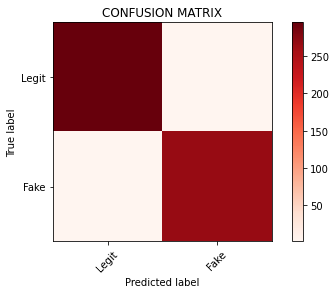

In [71]:
plot_confusion_matrix(conf)

In [72]:
model.save("./model/classifier_1.h5")